In [3]:
import pandas as pd
from simpletransformers.classification import ClassificationModel

train=pd.read_excel("/Users/MK/Desktop/tum_temiz2.xlsx")
test=pd.read_excel("/Users/MK/Desktop/test_verisi.xlsx")
train

,kategori,metin
0,bilim kurgu,dünyalılar dışında başka bir gezegende yaşayan...
1,bilim kurgu,kesinlikle kusursuz blade runner ve cyberpunk ...
2,bilim kurgu,macera mizah ve sihrin karşı konulmaz bir karı...
3,bilim kurgu,saddhu bu sözlerin ne olduğunu brajlala orada ...
4,bilim kurgu,bize tepkilerimizi kontrol etme gücünü veren v...
...,...,...
4610,spor,yüksek yoğunluklu interval antrenmanların horm...
4611,spor,yüzmenin neden olduğu vücut sıvı dengesindeki ...
4612,spor,yüzyıllardır sağlıklı olmak yaşlanmayı yavaşla...
4613,spor,zaman insanoğlunun sahip olduğu en değerli olg...


In [4]:
train["kategori"].unique()

array(['bilim kurgu', 'ekonomi', 'islam', 'polisiye', 'romantik',
       'sağlık', 'spor'], dtype=object)

In [5]:
train['labels'] = pd.factorize(train.kategori)[0]
test['labels'] = pd.factorize(test.kategori)[0]

In [6]:
train=train[["metin","labels"]]
test=test[["metin","labels"]]
train

,metin,labels
0,dünyalılar dışında başka bir gezegende yaşayan...,0
1,kesinlikle kusursuz blade runner ve cyberpunk ...,0
2,macera mizah ve sihrin karşı konulmaz bir karı...,0
3,saddhu bu sözlerin ne olduğunu brajlala orada ...,0
4,bize tepkilerimizi kontrol etme gücünü veren v...,0
...,...,...
4610,yüksek yoğunluklu interval antrenmanların horm...,6
4611,yüzmenin neden olduğu vücut sıvı dengesindeki ...,6
4612,yüzyıllardır sağlıklı olmak yaşlanmayı yavaşla...,6
4613,zaman insanoğlunun sahip olduğu en değerli olg...,6


In [7]:
train["metin"]=train["metin"].apply(lambda r: str(r))
train['labels']=train['labels'].astype(int)

C:\Users\MK\AppData\Local\Temp\ipykernel_11504\760660216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["metin"]=train["metin"].apply(lambda r: str(r))
C:\Users\MK\AppData\Local\Temp\ipykernel_11504\760660216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['labels']=train['labels'].astype(int)


In [ ]:
model = ClassificationModel('bert', 'dbmdz/bert-base-turkish-uncased', num_labels=7, use_cuda=False,
                                args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs': 3,
                                      "train_batch_size": 16, 'learning_rate': 1e-4 , "fp16":False, "output_dir": "bert_model"})
model.train_model(train)

In [9]:
# Modeli yükle
model = ClassificationModel('bert', 'bert_model', num_labels=7, use_cuda=False,
                            args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs': 3,
                                "train_batch_size": 16, "fp16": False, "output_dir": "bert_model"})

In [ ]:
labels = test.labels.values
tahminler = []
for i in range(len(test)):
    örnek = test.iloc[i]['metin']
    tahmin = model.predict([örnek])
    tahminler.append(tahmin[0])

In [47]:
# Tahminler ve etiketler listelerini bir veri çerçevesine dönüştür
df = pd.DataFrame({'Tahminler': tahminler, 'Etiketler': labels})

# Veri çerçevesini Excel dosyasına yaz
df.to_excel('tahminler_ve_etiketler.xlsx', index=False)

In [24]:
df = pd.read_excel('tahminler_ve_etiketler.xlsx')
tahminler = df['Tahminler']
labels = df['Etiketler']

Sınıf 0 için True Positives (TP): 102
Sınıf 0 için True Negatives (TN): 732
Sınıf 0 için False Positives (FP): 6
Sınıf 0 için False Negatives (FN): 0
Sınıf 1 için True Positives (TP): 128
Sınıf 1 için True Negatives (TN): 710
Sınıf 1 için False Positives (FP): 2
Sınıf 1 için False Negatives (FN): 0
Sınıf 2 için True Positives (TP): 125
Sınıf 2 için True Negatives (TN): 715
Sınıf 2 için False Positives (FP): 0
Sınıf 2 için False Negatives (FN): 0
Sınıf 3 için True Positives (TP): 118
Sınıf 3 için True Negatives (TN): 721
Sınıf 3 için False Positives (FP): 0
Sınıf 3 için False Negatives (FN): 1
Sınıf 4 için True Positives (TP): 118
Sınıf 4 için True Negatives (TN): 719
Sınıf 4 için False Positives (FP): 0
Sınıf 4 için False Negatives (FN): 3
Sınıf 5 için True Positives (TP): 113
Sınıf 5 için True Negatives (TN): 714
Sınıf 5 için False Positives (FP): 2
Sınıf 5 için False Negatives (FN): 11
Sınıf 6 için True Positives (TP): 117
Sınıf 6 için True Negatives (TN): 710
Sınıf 6 için False Posi

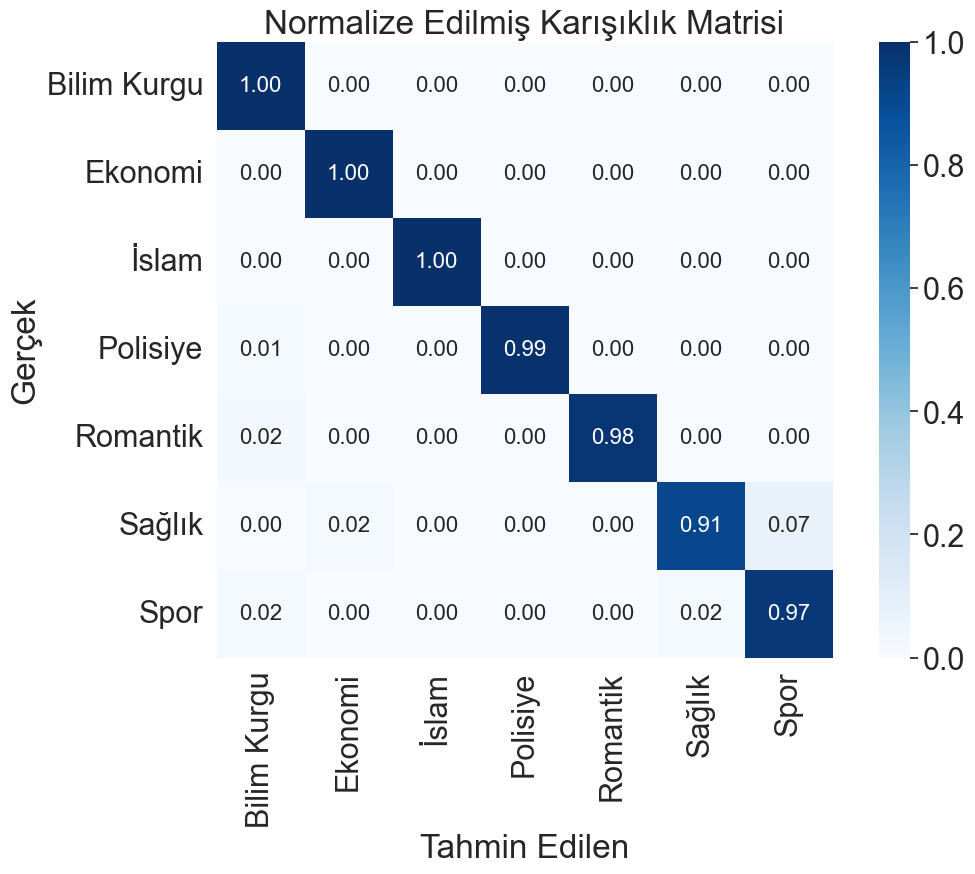

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
precision = precision_score(labels, tahminler, average='weighted')
recall = recall_score(labels, tahminler, average='weighted')
f1 = f1_score(labels, tahminler, average='weighted')
accuracy = accuracy_score(labels, tahminler)
cm = confusion_matrix(labels, tahminler)

# TP, TN, FP, FN hesaplama
TP = {}
TN = {}
FP = {}
FN = {}

# Her sınıf için TP, TN, FP, FN hesaplama
for i in range(len(cm)):
    TP[i] = cm[i, i]
    FP[i] = cm[:, i].sum() - cm[i, i]
    FN[i] = cm[i, :].sum() - cm[i, i]
    TN[i] = cm.sum() - (TP[i] + FP[i] + FN[i])

# Sonuçları yazdırma
for i in range(len(cm)):
    print(f'Sınıf {i} için True Positives (TP): {TP[i]}')
    print(f'Sınıf {i} için True Negatives (TN): {TN[i]}')
    print(f'Sınıf {i} için False Positives (FP): {FP[i]}')
    print(f'Sınıf {i} için False Negatives (FN): {FN[i]}')

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f'Accuracy: {accuracy:.3f}')
print(cm)
TP = cm.diagonal()
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (FP + FN + TP)

class_names = ['Bilim Kurgu', 'Ekonomi', 'İslam', 'Polisiye', 'Romantik', 'Sağlık', 'Spor']

class_metrics = classification_report(labels, tahminler, target_names=class_names, output_dict=True)

# Sonuçları tablo olarak göster
class_metrics_df = pd.DataFrame(class_metrics).transpose()
print(class_metrics_df)


warnings.simplefilter(action='ignore', category=FutureWarning)
mpl.rcParams.update({'font.size': 26})
mpl.rc('figure', figsize=(8, 8))
sns.set(font_scale=2.0)
sns.color_palette("deep")
%matplotlib inline
class_names = ['Bilim Kurgu', 'Ekonomi', 'İslam', 'Polisiye', 'Romantik', 'Sağlık', 'Spor']
class_metrics = classification_report(labels, tahminler, target_names=class_names, output_dict=True)

# Sonuçları tablo olarak göster
class_metrics_df = pd.DataFrame(class_metrics).transpose()
print(class_metrics_df)

# Karışıklık matrisini normalize etme
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Normalize edilmiş karışıklık matrisini çizme
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.heatmap(cm_normalized, annot=True, square=True,
                 xticklabels=class_names,
                 yticklabels=class_names,
                 fmt='.2f', cmap='Blues', annot_kws={"size": 16})
ax.set_xlabel('Tahmin Edilen')
ax.set_ylabel('Gerçek')
ax.set_title('Normalize Edilmiş Karışıklık Matrisi')
plt.show()


In [ ]:
for i in range(len(test)):
    if tahminler[i]!=labels[i]:
        print(labels[i],tahminler[i],test.iloc[i].name,test.iloc[i]['metin'])


In [ ]:
num = 3
örnek = test.iloc[num]['metin']
print(örnek)
print(test.iloc[num]['labels'])
tahmin=model.predict(örnek)
tahmin[0][0]

In [ ]:
if tahmin[0][0] == 0:
    print("Bilim Kurgu")
elif tahmin[0][0] == 1:
    print("ekonomi")
elif tahmin[0][0] == 2:
    print("islam")
elif tahmin[0][0] == 3:
    print("polisiye")
elif tahmin[0][0] == 4:
    print("romantik")
elif tahmin[0][0] == 5:
    print("sağlık")
elif tahmin[0][0] == 6:
    print("spor")


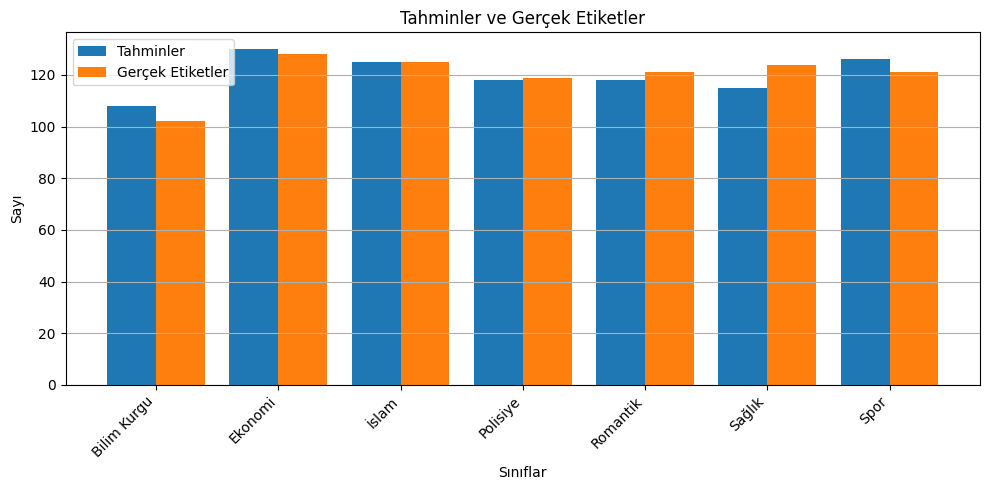

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Sınıf isimleri
class_names = ['Bilim Kurgu', 'Ekonomi', 'İslam', 'Polisiye', 'Romantik', 'Sağlık', 'Spor']

# Grafik çiz
plt.figure(figsize=(10, 5))
plt.hist([tahminler, labels], bins=np.arange(len(class_names) + 1) - 0.5, label=['Tahminler', 'Gerçek Etiketler'])
plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
plt.xlabel('Sınıflar')
plt.ylabel('Sayı')
plt.title('Tahminler ve Gerçek Etiketler')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()